In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [63]:
df=pd.read_csv(r'C:\Users\SDS\Downloads\weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\SDS\AppData\Local\Temp\ipykernel_14544\2946572041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\SDS\AppData\Local\Temp\ipykernel_14544\2946572041.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


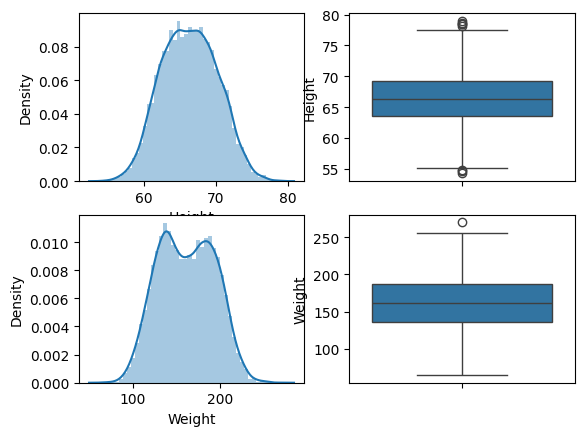

In [64]:
plt.Figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.subplot(2,2,3)
sns.distplot(df['Weight'])

plt.subplot(2,2,4)
sns.boxplot(df['Weight'])

plt.show()

In [65]:
# decide percentile 

upper_limit=df['Height'].quantile(0.99)

lower_limit=df['Height'].quantile(0.1)

In [66]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [67]:
# finding outliers 

df[(df['Height']>=upper_limit) |(df['Height']<=lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9984,Female,59.047029,111.707369
9988,Female,59.538729,121.244876
9989,Female,60.955084,95.686674
9993,Female,60.030434,97.687432


In [68]:
# triming 

new_df=df[(df['Height']<=upper_limit) &(df['Height']>=lower_limit)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [69]:
new_df['Height'].describe()

count    8900.000000
mean       66.985412
std         3.218155
min        61.412936
25%        64.361935
50%        66.820097
75%        69.381737
max        74.785714
Name: Height, dtype: float64

C:\Users\SDS\AppData\Local\Temp\ipykernel_14544\1796027079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


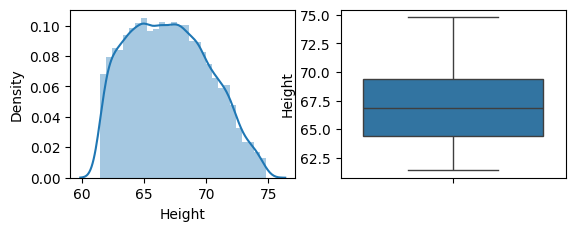

In [70]:
plt.Figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(new_df['Height'])

plt.subplot(2,2,2)
sns.boxplot(new_df['Height'])

plt.show()

In [71]:
# cappinig_ Winsorization

df['Height']=np.where(df['Height']>=upper_limit,upper_limit,

        np.where(df['Height']<=lower_limit,lower_limit,df['Height']))

C:\Users\SDS\AppData\Local\Temp\ipykernel_14544\1508671302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


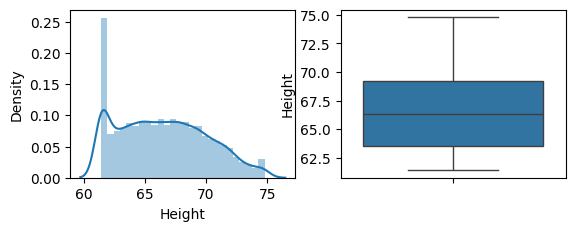

In [72]:
plt.Figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.show()